- Satisfaction : 1 - 5
- Airline Status : platinium, gold, silver, blue
- Age : customer age
- Age Range : 0-19, 20-29, ..., 80+
- Gender : Male or Female
- Price Sensitivity : 0-5
- Year of First Flight : the first flight of each customer
- No of Flights p.a : the number of flights that each customer has taken
- No of Flights p.a. grouped : 0, 1-10
- % of Flight with other Airlines : ..
- Type of Travel : purpose of the travel (business, personal, mileage)
- No. of other Loyalty Cards
- Shopping Amount at Airport : number of products
- Eating and Drinking at Airport : the quantity eating and drinking per each consumer at the airport
- Class : business, economy plus, economy
- Day of Month
- Flight Date
- Airline Code : 
- Airline Name :
- Orgin City:
- Origin State:
- Destination City
- Destination State
- Scheduled Departure Hour: 1 am to 23 pm
- Departure Delay in Minutes
- Arrival Delay in Minutes
- Flight Cancelled
- Flight time in minutes
- Flight Distance: in minutes
- Arrival Delay greater 5 Mins

In [1]:
import pandas as pd
import numpy as np
import featuretools as ft
import seaborn as sns; sns.set()
from matplotlib import pyplot

In [2]:
airline = pd.read_excel("../data/airline.xlsx")

In [3]:
airline["customer_id"] = list(range(airline.shape[0]))

In [4]:
airline.head()

,Satisfaction,Airline Status,Age,Age Range,Gender,Price Sensitivity,Year of First Flight,No of Flights p.a.,No of Flights p.a. grouped,% of Flight with other Airlines,...,Destination City,Destination State,Scheduled Departure Hour,Departure Delay in Minutes,Arrival Delay in Minutes,Flight cancelled,Flight time in minutes,Flight Distance,Arrival Delay greater 5 Mins,customer_id
0,4.5,Blue,31,30-39,Male,1,2007,27.545328,21 to 30,7,...,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no,0
1,4.0,Blue,56,50-59,Male,2,2006,40.655509,41 to 50,3,...,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no,1
2,2.5,Blue,21,20-29,Female,2,2006,8.368201,1 to 10,7,...,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes,2
3,4.0,Blue,43,40-49,Male,1,2007,8.716876,1 to 10,9,...,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes,3
4,5.0,Silver,49,40-49,Male,1,2006,13.598326,11 to 20,10,...,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no,4


In [5]:
es = ft.EntitySet(id = 'airline')

In [6]:
observations = ["Satisfaction"]
kpis = ["Shopping Amount at Airport", "Eating and Drinking at Airport"]

In [7]:
loading_factors = airline.drop(labels=observations + kpis, axis=1)

In [8]:
es = es.entity_from_dataframe(entity_id = 'c_id', dataframe = loading_factors, 
                              index = 'customer_id')

In [9]:
trans_primitives = ['weekend', 'cum_sum', 'day', 'month', 'diff']

features, feature_names = ft.dfs(entityset = es, 
                                 target_entity = 'c_id',
                                 max_depth = 2,
                                verbose=True)

Built 30 features
Elapsed: 00:01 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [10]:
feature_matrix_enc, features_enc = ft.encode_features(features, feature_names)

In [11]:
feature_matrix_enc = feature_matrix_enc.dropna(axis=1)

In [12]:
feature_matrix_enc = feature_matrix_enc.loc[:, (feature_matrix_enc != 0).any(axis=0)]

In [16]:
feature_matrix_enc.sum()

factor_0      8.891000e+04
factor_1      2.597000e+04
factor_2      1.083700e+04
factor_3      4.172000e+03
factor_4      6.000381e+06
factor_5      2.746600e+04
factor_6      2.632100e+04
factor_7      2.198800e+04
factor_8      1.549600e+04
factor_9      1.547400e+04
factor_10     9.796000e+03
factor_11     8.092000e+03
factor_12     5.256000e+03
factor_13     7.337400e+04
factor_14     5.651500e+04
factor_15     1.656740e+05
factor_16     2.607143e+08
factor_17     2.609627e+06
factor_18     3.763300e+04
factor_19     3.004400e+04
factor_20     2.673100e+04
factor_21     1.587900e+04
factor_22     8.530000e+03
factor_23     6.031000e+03
factor_24     3.746000e+03
factor_25     9.930000e+02
factor_26     2.260000e+02
factor_27     5.900000e+01
factor_28     1.700000e+01
factor_29     1.209767e+06
                  ...     
factor_105    1.274880e+05
factor_106    2.401000e+03
factor_107    1.031064e+08
factor_108    8.538500e+04
factor_109    4.450400e+04
factor_110    4.714000e+03
f

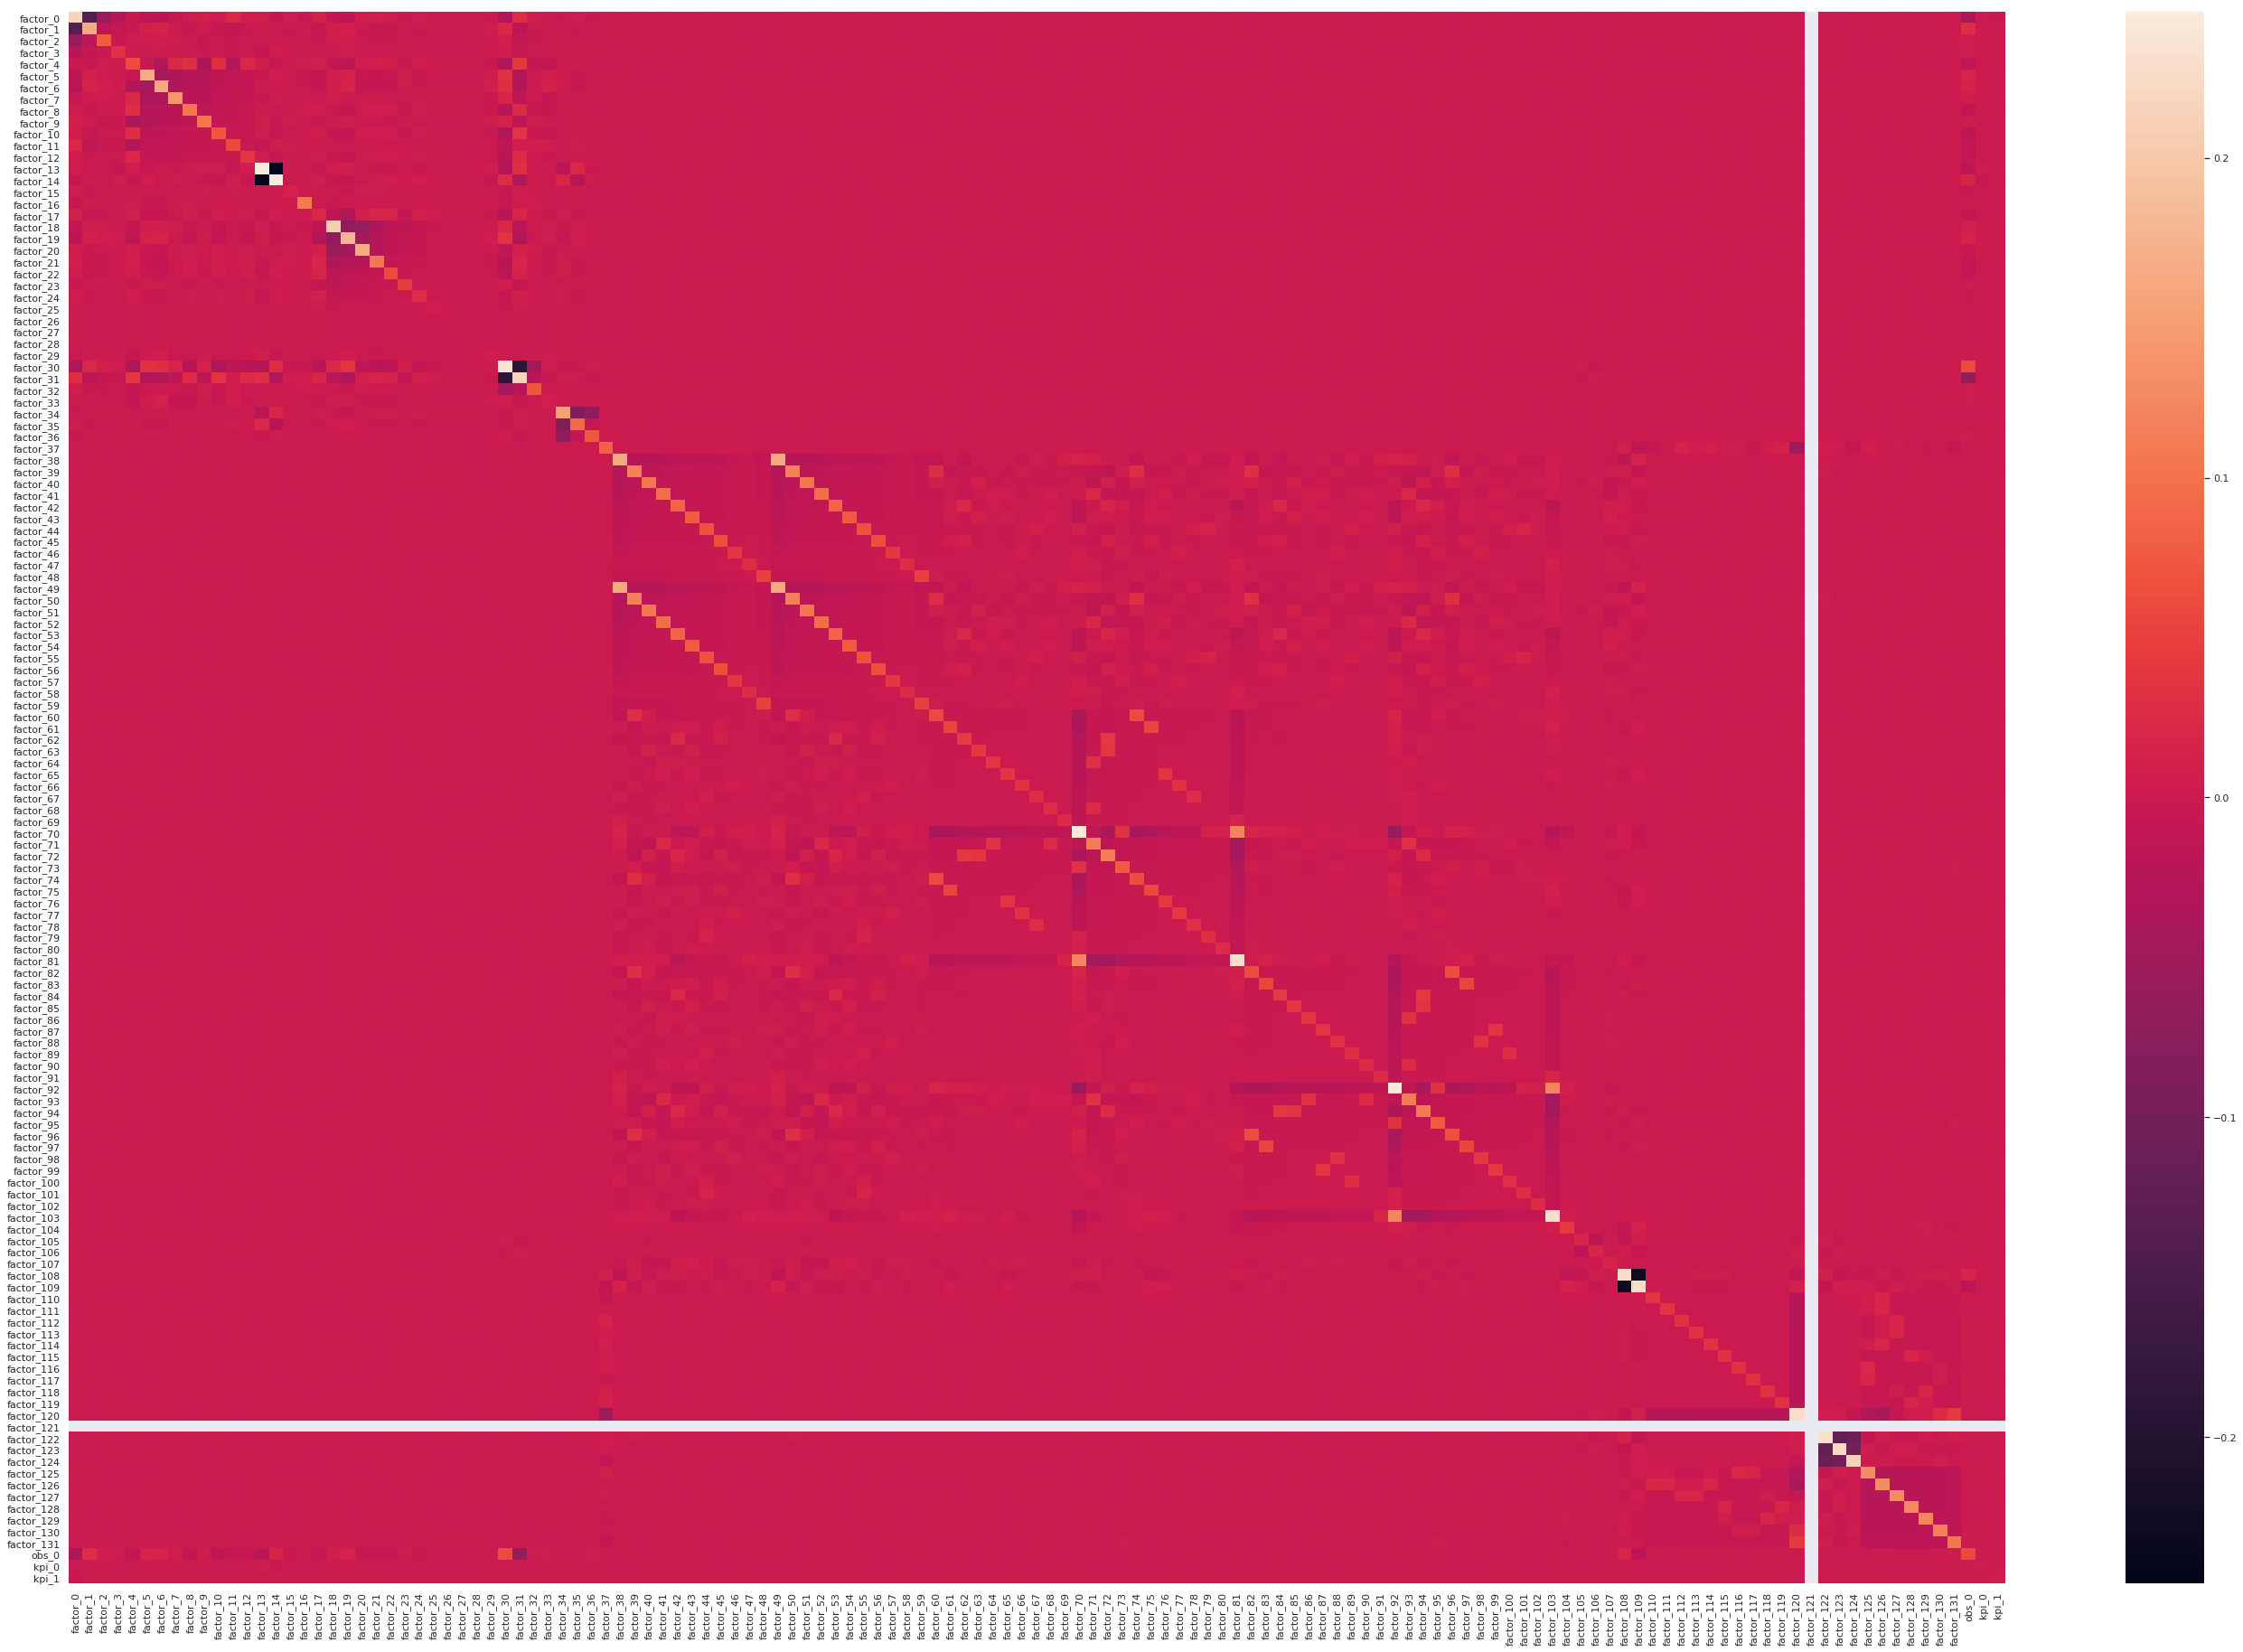

In [17]:
a4_dims = (48, 32)
fig, ax = pyplot.subplots(figsize=a4_dims)
corrfig = sns.heatmap(ax=ax, data=feature_matrix_enc.cov())

In [14]:
factors_dict = {}
code2factors = {}
for factor in feature_matrix_enc.columns:
    factors_dict[factor] = "factor_" + str(len(factors_dict))
    code2factors[factors_dict[factor]] = factor

feature_matrix_enc.columns = [factors_dict[c] for c in feature_matrix_enc.columns]

obs_dict = {}
code2obs = {}
for obs in observations:
    obs_dict[obs] = "obs_" + str(len(obs_dict))
    feature_matrix_enc[obs_dict[obs]] = airline[obs]
    code2obs[obs_dict[obs]] = obs
    
kpis_dict = {}
code2kpi = {}
for kpi in kpis:
    kpis_dict[kpi] = "kpi_" + str(len(kpis_dict))
    feature_matrix_enc[kpis_dict[kpi]] = airline[kpi]
    code2kpi[kpis_dict[kpi]] = kpi

feature_matrix_enc.head()

,factor_0,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,factor_9,...,factor_125,factor_126,factor_127,factor_128,factor_129,factor_130,factor_131,obs_0,kpi_0,kpi_1
customer_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,31,0,1,0,0,0,...,0,0,0,0,0,1,0,4.5,0,75
1,1,0,0,0,56,0,0,1,0,0,...,0,0,0,0,0,0,1,4.0,15,60
2,1,0,0,0,21,0,0,0,0,1,...,0,0,0,0,0,0,1,2.5,0,135
3,1,0,0,0,43,1,0,0,0,0,...,0,0,1,0,0,0,0,4.0,10,45
4,0,1,0,0,49,1,0,0,0,0,...,0,0,0,0,0,1,0,5.0,8,26


In [18]:
code2factors["factor_121"]

'YEAR(Flight date) = 2014'

In [ ]:
feature_matrix_enc.to_csv("../data/airline_encoded.csv", index=False, sep="\t")

In [ ]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

import rpy2
from rpy2.robjects.packages import importr
lavaan = importr("lavaan")

In [ ]:
r_dataframe = rpy2.robjects.DataFrame(feature_matrix_enc)

In [ ]:
r_dataframe.colnames

In [ ]:
def build_model_definition(obs_dict, kpis_dict, factors_dict):
    model = "factors =~ "
    factors = list(factors_dict.values())
    for i in range(len(factors_dict)):
        model += factors[i]
        if i != len(factors_dict) - 1:
            model += " + "
        else:
            model += "\n"
    
    model += "cx ~ factors\n"
    model += "cx =~ "
    
    observations = list(obs_dict.values())
    for i in range(len(obs_dict)):
        model += observations[i]
        if i != len(obs_dict) - 1:
            model += " + "
        else:
            model += "\n"
    
    kpis = list(kpis_dict.values())
    for i in range(len(kpis_dict)):
        model += kpis[i]
        if i != len(kpis_dict) - 1:
            model += " + "
        else:
            model += " ~ cx"
    
    return model

In [ ]:
model = build_model_definition(obs_dict, kpis_dict, factors_dict)

In [ ]:
model

In [ ]:
rscript = '''library("lavaan")

gendata <- read.csv(file="../data/airline_encoded.csv", header=TRUE, sep="\t")
model <- '{}'
fit <- sem(model, gendata, std.lv = TRUE, std.ov = TRUE,
            control = list(maxit = 100000),
            estimator = "ULS",
            meanstructure = TRUE,
            optim.method = "BFGS",
            verbose=TRUE,
           ordered = c("Flight_cancelled", "Class"))
fits <- fitmeasures(fit, c("npar", "chisq", "df", "cfi", "rmsea", "srmr"))
'''.format(model)

In [ ]:
rpy2.robjects.r(rscript)

In [ ]:
rpy2.robjects.globalenv['fits']

In [ ]:
rpy2.robjects.globalenv['model'][0]

In [ ]:
lavaan.sem(rpy2.robjects.globalenv['model'][0], r_df)